# Capstone Project - Battle Of Neighbourhoods

**Name:Priya Kate**

**Exploring Pizza restaurants in London using Foursquare API & Machine Learning**

 **Introduction : Business problem**

There are many Pizza restaurants in London who have  rating and user tips. As a part of data science consulting project, I have been assigned analytics work to find optimal location from Central London having good ratings and maximum user tips. Since, there are lots of  pizza restaurants in London, my project reports will help Pizza lovers who are new in London.  We would also prefer locations as close to city center as possible. 

In [1]:
#Import libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!pip install beautifulsoup4
!pip install lxml
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from bs4 import BeautifulSoup

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [78]:
CLIENT_ID = '4KD215VFIDGGXDUJUMFR1FB0GKZRPDGXO3VPDO5AVTE3S35K' # your Foursquare ID
CLIENT_SECRET = 'RMGUWPQH3OY2SPNRARNFMVSU334PO5K5VO4D1GK0UPD0Y24C' # your Foursquare Secret
ACCESS_TOKEN = 'K3JNTSFJKPTEPNSWXX1I4Z5TLYEVKZAW342TON5ZUH41Z55N' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4KD215VFIDGGXDUJUMFR1FB0GKZRPDGXO3VPDO5AVTE3S35K
CLIENT_SECRET:RMGUWPQH3OY2SPNRARNFMVSU334PO5K5VO4D1GK0UPD0Y24C


In [79]:
address = 'London'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.5073219 -0.1276474


In [80]:
search_query='Pizza'
radius = 1000000
print(search_query + ' .... OK!')

Pizza .... OK!


In [81]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=4KD215VFIDGGXDUJUMFR1FB0GKZRPDGXO3VPDO5AVTE3S35K&client_secret=RMGUWPQH3OY2SPNRARNFMVSU334PO5K5VO4D1GK0UPD0Y24C&ll=51.5073219,-0.1276474&oauth_token=K3JNTSFJKPTEPNSWXX1I4Z5TLYEVKZAW342TON5ZUH41Z55N&v=20180604&query=Pizza&radius=1000000&limit=30'

In [82]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60cdd6de7416412c48609b35'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4b5061def964a520cb2127e3',
    'name': 'Pizza Express',
    'location': {'address': '450 Strand',
     'lat': 51.50846400384665,
     'lng': -0.12615674889104866,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.50846400384665,
       'lng': -0.12615674889104866}],
     'distance': 163,
     'postalCode': 'WC2R 0RG',
     'cc': 'GB',
     'city': 'London',
     'state': 'Greater London',
     'country': 'United Kingdom',
     'formattedAddress': ['450 Strand',
      'London',
      'Greater London',
      'WC2R 0RG',
      'United Kingdom']},
    'categories': [{'id': '4bf58dd8d48988d1ca941735',
      'name': 'Pizza Place',
      'pluralName': 'Pizza Places',
      'shortName': 'Pizza',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
       'suffix': '.png'},
      'pri

In [83]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

C:\Users\AMOL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,location.crossStreet,venuePage.id
0,4b5061def964a520cb2127e3,Pizza Express,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1624102622,False,450 Strand,51.508464,-0.126157,"[{'label': 'display', 'lat': 51.50846400384665...",163,WC2R 0RG,GB,London,Greater London,United Kingdom,"[450 Strand, London, Greater London, WC2R 0RG,...",NaN,NaN,NaN
1,4bc6005242419521ca66031d,Pizza Hut,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1624102622,False,56/59 Strand,51.509410,-0.123401,"[{'label': 'display', 'lat': 51.50941028020451...",374,WC2N 5LR,GB,London,Greater London,United Kingdom,"[56/59 Strand, London, Greater London, WC2N 5L...",NaN,NaN,NaN
2,4b5e09fef964a520747a29e3,Pizza Express,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1624102622,False,85 Victoria Street,51.497458,-0.135103,"[{'label': 'display', 'lat': 51.4974582, 'lng'...",1213,SW1H 0HW,GB,London,Greater London,United Kingdom,"[85 Victoria Street, London, Greater London, S...",NaN,NaN,NaN
3,4c41b1e6520fa5935af3c9ac,Pizza Hut,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1624102622,False,"Piccadilly Circus, 29-31 Regent Street",51.509348,-0.134752,"[{'label': 'display', 'lat': 51.5093476677347,...",541,SW1Y 4NQ,GB,Piccadilly,Greater London,United Kingdom,"[Piccadilly Circus, 29-31 Regent Street, Picca...",NaN,NaN,NaN
4,4bcd8f10fb84c9b6f022223e,Pizza Hut,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1624102622,False,19 Leicester Square,51.510849,-0.129475,"[{'label': 'display', 'lat': 51.510849, 'lng':...",412,WC2H 7LE,GB,Leicester Square,Greater London,United Kingdom,"[19 Leicester Square, Leicester Square, Greate...",West End,NaN,NaN
5,51dfcc1a498e1abc7c95e3e4,Pizza Pilgrims,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1624102622,False,11-12 Dean St,51.514906,-0.133310,"[{'label': 'display', 'lat': 51.51490606630752...",930,W1D 3RP,GB,Soho,Greater London,United Kingdom,"[11-12 Dean St (at Carlisle St), Soho, Greater...",NaN,at Carlisle St,NaN
6,4ac518e6f964a52019ab20e3,Gourmet Pizza Co.,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1624102622,False,56 Upper Ground,51.508148,-0.109966,"[{'label': 'display', 'lat': 51.50814841900838...",1228,SE1 9PP,GB,London,Greater London,United Kingdom,"[56 Upper Ground (Gabriels Wharf), London, Gre...","South Bank, London, Greater London",Gabriels Wharf,NaN
7,4b2e32cdf964a52041dd24e3,Pizza Express,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1624102622,False,9-12 Bow Street,51.513606,-0.122913,"[{'label': 'display', 'lat': 51.5136062, 'lng'...",772,WC2E 7AH,GB,Covent Garden,Greater London,United Kingdom,"[9-12 Bow Street, Covent Garden, Greater Londo...",NaN,NaN,NaN
8,4c52088f2543a593d8f8dd84,Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1624102622,False,1 Shepherd Street,51.510703,-0.143774,"[{'label': 'display', 'lat': 51.51070300518182...",1178,W1J 7HJ,GB,London,Greater London,United Kingdom,"[1 Shepherd Street, London, Greater London, W1...",NaN,NaN,NaN
9,4ac518daf964a520c9a820e3,Pizza Express,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1624102622,False,"10 Dean Street, Soho",51.515124,-0.133317,"[{'label': 'display', 'lat': 51.51512355793952...",953,W1D 3RW,GB,Soho,Greater London,United Kingdom,"[10 Dean Street, Soho, Soho, Greater London, W...",NaN,NaN,NaN


In [84]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,crossStreet,id
0,Pizza Express,Pizza Place,450 Strand,51.508464,-0.126157,"[{'label': 'display', 'lat': 51.50846400384665...",163,WC2R 0RG,GB,London,Greater London,United Kingdom,"[450 Strand, London, Greater London, WC2R 0RG,...",NaN,NaN,4b5061def964a520cb2127e3
1,Pizza Hut,Pizza Place,56/59 Strand,51.509410,-0.123401,"[{'label': 'display', 'lat': 51.50941028020451...",374,WC2N 5LR,GB,London,Greater London,United Kingdom,"[56/59 Strand, London, Greater London, WC2N 5L...",NaN,NaN,4bc6005242419521ca66031d
2,Pizza Express,Pizza Place,85 Victoria Street,51.497458,-0.135103,"[{'label': 'display', 'lat': 51.4974582, 'lng'...",1213,SW1H 0HW,GB,London,Greater London,United Kingdom,"[85 Victoria Street, London, Greater London, S...",NaN,NaN,4b5e09fef964a520747a29e3
3,Pizza Hut,Pizza Place,"Piccadilly Circus, 29-31 Regent Street",51.509348,-0.134752,"[{'label': 'display', 'lat': 51.5093476677347,...",541,SW1Y 4NQ,GB,Piccadilly,Greater London,United Kingdom,"[Piccadilly Circus, 29-31 Regent Street, Picca...",NaN,NaN,4c41b1e6520fa5935af3c9ac
4,Pizza Hut,Pizza Place,19 Leicester Square,51.510849,-0.129475,"[{'label': 'display', 'lat': 51.510849, 'lng':...",412,WC2H 7LE,GB,Leicester Square,Greater London,United Kingdom,"[19 Leicester Square, Leicester Square, Greate...",West End,NaN,4bcd8f10fb84c9b6f022223e
5,Pizza Pilgrims,Pizza Place,11-12 Dean St,51.514906,-0.133310,"[{'label': 'display', 'lat': 51.51490606630752...",930,W1D 3RP,GB,Soho,Greater London,United Kingdom,"[11-12 Dean St (at Carlisle St), Soho, Greater...",NaN,at Carlisle St,51dfcc1a498e1abc7c95e3e4
6,Gourmet Pizza Co.,Pizza Place,56 Upper Ground,51.508148,-0.109966,"[{'label': 'display', 'lat': 51.50814841900838...",1228,SE1 9PP,GB,London,Greater London,United Kingdom,"[56 Upper Ground (Gabriels Wharf), London, Gre...","South Bank, London, Greater London",Gabriels Wharf,4ac518e6f964a52019ab20e3
7,Pizza Express,Pizza Place,9-12 Bow Street,51.513606,-0.122913,"[{'label': 'display', 'lat': 51.5136062, 'lng'...",772,WC2E 7AH,GB,Covent Garden,Greater London,United Kingdom,"[9-12 Bow Street, Covent Garden, Greater Londo...",NaN,NaN,4b2e32cdf964a52041dd24e3
8,Pizza,Pizza Place,1 Shepherd Street,51.510703,-0.143774,"[{'label': 'display', 'lat': 51.51070300518182...",1178,W1J 7HJ,GB,London,Greater London,United Kingdom,"[1 Shepherd Street, London, Greater London, W1...",NaN,NaN,4c52088f2543a593d8f8dd84
9,Pizza Express,Pizza Place,"10 Dean Street, Soho",51.515124,-0.133317,"[{'label': 'display', 'lat': 51.51512355793952...",953,W1D 3RW,GB,Soho,Greater London,United Kingdom,"[10 Dean Street, Soho, Soho, Greater London, W...",NaN,NaN,4ac518daf964a520c9a820e3


In [113]:
dataframe_filtered.to_excel("output.xlsx") 

In [85]:
dataframe_filtered.name

0                  Pizza Express
1                      Pizza Hut
2                  Pizza Express
3                      Pizza Hut
4                      Pizza Hut
5                 Pizza Pilgrims
6              Gourmet Pizza Co.
7                  Pizza Express
8                          Pizza
9                  Pizza Express
10                 Pizza Express
11                     Pizza Hut
12                 Pizza Express
13                Pizza Pilgrims
14        Pizzeria Big Ben Pizza
15                  PizzaExpress
16                     Pizza Hut
17                 Mayfair Pizza
18            Pizza Pilgrims Van
19                     Pizza Hut
20                   Pizza Union
21    Street Pizza Gordon Ramsay
22                  PizzaExpress
23                Domino's Pizza
24                   Ray's Pizza
25       Slice by Pizza Pilgrims
26        Pizza Hut By The Slice
27       Stars And Stripes Pizza
28                  PizzaExpress
29                     Pizza Hut
Name: name

In [86]:
import seaborn as sns

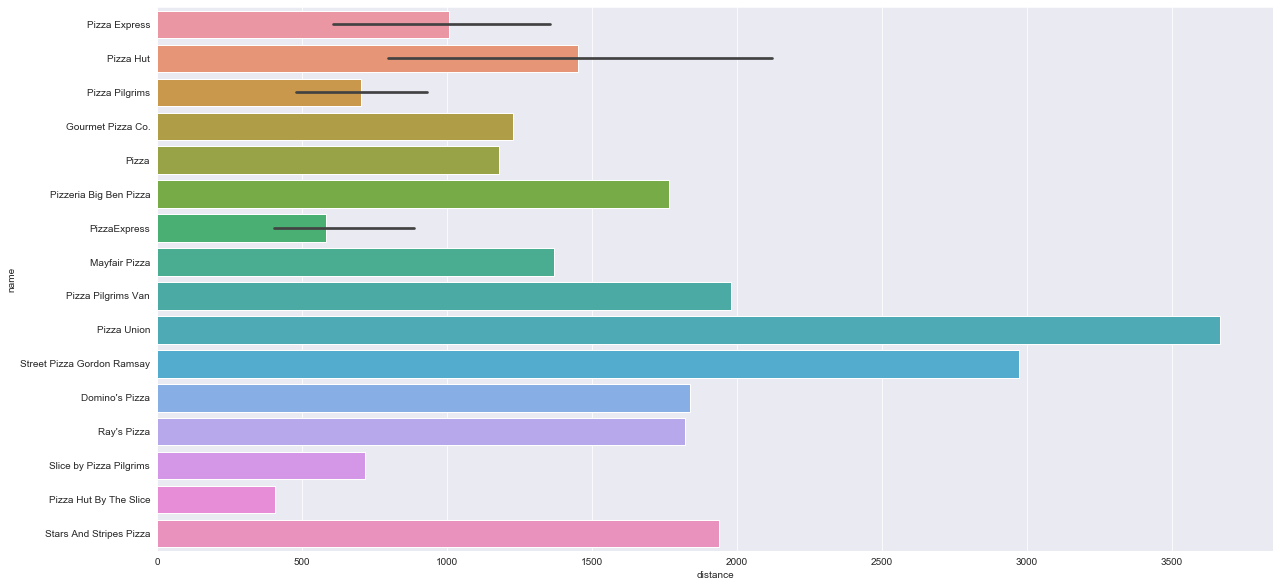

In [87]:
sns.set({'figure.figsize':(20,10)})
sns.barplot(x='distance',y='name',data=dataframe_filtered,orient="V" )

In [106]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Pimple saudagar

# add a red circle marker to represent the pimple saudagar
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='London',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Pizza shop as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [92]:
# Explore closest Pizza Restaurant

venue_id = '4bb5fe38f562ef3b63772f97' # ID of Pizza Hut
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
url

'https://api.foursquare.com/v2/venues/4bb5fe38f562ef3b63772f97?client_id=4KD215VFIDGGXDUJUMFR1FB0GKZRPDGXO3VPDO5AVTE3S35K&client_secret=RMGUWPQH3OY2SPNRARNFMVSU334PO5K5VO4D1GK0UPD0Y24C&oauth_token=K3JNTSFJKPTEPNSWXX1I4Z5TLYEVKZAW342TON5ZUH41Z55N&v=20180604'

In [93]:
#Send GET request for result

result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'likes', 'like', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'description', 'storeId', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '4bb5fe38f562ef3b63772f97',
 'name': 'Pizza Hut',
 'contact': {'phone': '+442079359100',
  'formattedPhone': '+44 20 7935 9100',
  'twitter': 'pizzahutuk',
  'instagram': 'pizzahutuk',
  'facebook': '150129181687274',
  'facebookUsername': 'PizzaHutBakerStreet',
  'facebookName': 'Pizza Hut Restaurants UK'},
 'location': {'address': '187 Baker St',
  'lat': 51.52244034336849,
  'lng': -0.15777675449112394,
  'labeledLatLngs': [{'label': 'display',
    'lat': 51.52244034336849,
    'lng': -0.15777675449112394}],
  'postalCode': 'NW1 6UY',
  'cc': 'GB',
  'city': 'London',
  'state': 'Greater London',
  'country': 'United Kingdom',
  'formattedAddress': ['187 Baker St',
   'London',
   'Greater London',
   'NW1 6UY',
   'United Kingdom']},
 'canonicalUrl': 'https://foursquare.com/v/pizza-hut/4bb5fe38f562ef3b63772f97',
 'categories': [{'id': '4bf58dd8d48988d1ca941735',
   'name': 'Pizza Place',
   'pluralName': 'Pizza Places',
   'shortName': 'Pizza',
   'icon': {'prefix': 'https:/

In [94]:
# Get the venue's overall rating for Pizza Hut

try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.0


In [91]:
# 

venue_id = '4bb5fe38f562ef3b63772f97' # ID Pizza Hut
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.0


In [107]:
venue_id = '51dfcc1a498e1abc7c95e3e4' # ID pizza pilgrims
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.2


In [108]:
venue_id = '4ac518e6f964a52019ab20e3' # ID gorment pizza co
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.3


In [110]:
venue_id = '4b5061def964a520cb2127e3' # ID slice by pizza Express
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.3


In [111]:
venue_id = '4c52088f2543a593d8f8dd84' # ID slice by pizza 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [174]:
venue_id = '51dfcc1a498e1abc7c95e3e4' # ID slice by pizza pilgrims - Final Selection
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.2


In [175]:
#Get the number of tips

result['response']['venue']['tips']['count']

177

In [176]:
#Create URL and send GET request. Make sure to set limit to get all tips

limit = 177 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&oauth_token={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60cdfcd71f121936c2ba7378'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'tips': {'count': 161,
   'items': [{'id': '53e25059498e1550f3853f85',
     'createdAt': 1407340633,
     'text': 'The best Neapolitan-style pizza you can have in London. The interior gets quite warm during the summer – have a seat outside or choose take away and go to Soho Square. Good service, great value.',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/53e25059498e1550f3853f85',
     'photo': {'id': '53e2505d498e9c1e46b388dc',
      'createdAt': 1407340637,
      'source': {'name': 'Foursquare for iOS',
       'url': 'https://foursquare.com/download/#/iphone'},
      'prefix': 'https://fastly.4sqi.net/img/general/',
      'suffix': '/6164189_IRII6t5uSWFu9Cpw-25Jbnve1nUh53hvZher2RSI5zs.jpg',
      'width': 720,
      'height': 720,
      'visibility': 'public'},
     'photourl': 'https://fastly.4sqi.net/i

In [177]:
# Get tips and list of associated features

tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'photo', 'photourl', 'likes', 'like', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user'])

In [178]:
# Format column width and display all tips

pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered.reindex()

C:\Users\AMOL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\AMOL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.id
0,"The best Neapolitan-style pizza you can have in London. The interior gets quite warm during the summer – have a seat outside or choose take away and go to Soho Square. Good service, great value.",4,0,53e25059498e1550f3853f85,Lele,Buonerba,6164189


In [179]:
# Define URL, send GET request and display features associated with user

idnumber = '6164189' # user ID with most agree counts and complete profile

url = 'https://api.foursquare.com/v2/users/{}/?client_id={}&client_secret={}&oauth_token={}&v={}'.format(idnumber,CLIENT_ID, CLIENT_SECRET, ACCESS_TOKEN,VERSION) # define URL

# send GET request
results = requests.get(url).json()

user_data=results['response']['user']['photos']['items']

#results
pd.set_option('display.max_colwidth', -1)

users_df = json_normalize(user_data)
#This mainly used later to display the photo of the user
filtered_columns = ['id','prefix','suffix','width','height']
tips_filtered = users_df.loc[:, filtered_columns]
#url
tips_filtered

C:\Users\AMOL\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]
C:\Users\AMOL\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


,id,prefix,suffix,width,height
0,5864cf4ee386e329a41e9078,https://fastly.4sqi.net/img/general/,/6164189_eHrCO8bvc-DQQgUE3He8x8jnuiePgiHZWcdnhgrg6Tc.jpg,1440,1920


In [180]:

g=tips_df.loc[tips_df['user.id'] == '6164189']
print('First Name: ' + tips_df['user.firstName'])
print('Last Name: ' + tips_df['user.lastName'])

0    First Name: Lele
Name: user.firstName, dtype: object
0    Last Name: Buonerba
Name: user.lastName, dtype: object


In [181]:
# Get User's tips

# define tips URL
user_id='6164189'
url = 'https://api.foursquare.com/v2/users/{}/tips?client_id={}&client_secret={}&oauth_token={}&v={}&limit={}'.format(user_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN,VERSION, limit)

# send GET request and get user's tips
results = requests.get(url).json()
tips = results['response']['tips']['items']

# format column width
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips)

# filter columns
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display user's tips
tips_filtered

C:\Users\AMOL\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if sys.path[0] == '':
C:\Users\AMOL\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,text,agreeCount,disagreeCount,id
0,Pizza with tomato sauce and a whole form of burrata cheese is spectacular. Highly recommend this place! Get a reservation.,0,0,58612bf92321c6675b596457
1,Free wifi is only up to 30min. Terminal 8 AA bag drop off has long lines but they move quickly. Security was fine. Below average food options at T8 – McDonalds or Aunt Annie's are your best choices.,1,0,57de8c2c498ea040bf1eba40
2,"Good: you can get here with a train from Centrale, Garibaldi or Cadorna. Bad: if you're flying to the US (I was on AA) the Terminal 1 check-in area's placement makes no sense at all. Okay overall.",0,0,57de8b83498ea711b76a4822
3,"My favorite discotheque in Milan. Beautiful atmosphere, I especially love the smaller room (pictured). Don't miss out on NUL – Friday nights, €15 entry with a drink and coat check, great fun and DJs.",1,0,57de8aef498e40323c6a22a5
4,"Absolutely loved this place! After three hours of dancing at Output's rooftop, delicious Mediterranean food was just what I needed. It's not on the list but you can order arak! Very peculiar drink.",0,0,57de89c5498e40323c67ec68
5,"Loved the cortado! Great atmosphere but I didn't have the patience to wait to be seated for Sunday brunch, although it looks like it's well worth it!",0,0,57de88f8cd104ad3b630c178
6,"The best record store I've been to in New York. Fantastic selections of secondhand records in very good condition. I bought a whole lot of disco 12"" for extremely fair prices (most for just $3).",1,0,57de88ae498ed3f735ef44f0
7,"I heard this was the best daytime party in New York from people I met all over downtown Manhattan and Brooklyn. They were all right. Do not miss out, and go early if you can! First 50 at the door $10.",2,0,57de87d5498e4f8459c3b0c7
8,"I'll admit I went here for James Murphy (the LCD Soundsystem frontman is a partner), but I stayed for the fantastic wine, service and music. Fantastic atmosphere and I love the Ekco Eterna cutlery!",0,0,57de86e6498ef56a77ff8e4b
9,"Get the French toast with maple syrup – it's delicious. If you're with a friend split one serving so it doesn't go cold, you get a lot of food on your plate.",0,0,57de85e1498edbf6bc2d8244


In [182]:
# Let's get the venue for the tip with the greatest number of agree counts

tip_id = '53e28097498e72d1666528e6' # tip id

# define URL
url = 'https://api.foursquare.com/v2/users/{}/tips?client_id={}&client_secret={}&oauth_token={}&v={}'.format(idnumber, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION) # define URL


# send GET Request and examine results
result = requests.get(url).json()
print(result['response']['tips']['items'][0]['venue']['name'])
print(result['response']['tips']['items'][0]['venue']['location'])

Bottega Baretti
{'address': "Via Sant'Anselmo 28/F", 'crossStreet': 'Via Baretti', 'lat': 45.057895312490075, 'lng': 7.680486155038875, 'labeledLatLngs': [{'label': 'display', 'lat': 45.057895312490075, 'lng': 7.680486155038875}], 'postalCode': '10125', 'cc': 'IT', 'city': 'Torino', 'state': 'Piemonte', 'country': 'Italia', 'formattedAddress': ["Via Sant'Anselmo 28/F (Via Baretti)", '10125 Torino Piemonte', 'Italia']}


In [184]:
tip_id = '5473c2ad498e57dce2e84f58' # tip id

# define URL
url = 'https://api.foursquare.com/v2/users/{}/tips?client_id={}&client_secret={}&oauth_token={}&v={}'.format(idnumber, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION) # define URL


# send GET Request and examine results
result = requests.get(url).json()
print(result['response']['tips']['items'][0]['venue']['name'])
print(result['response']['tips']['items'][0]['venue']['location'])

Bottega Baretti
{'address': "Via Sant'Anselmo 28/F", 'crossStreet': 'Via Baretti', 'lat': 45.057895312490075, 'lng': 7.680486155038875, 'labeledLatLngs': [{'label': 'display', 'lat': 45.057895312490075, 'lng': 7.680486155038875}], 'postalCode': '10125', 'cc': 'IT', 'city': 'Torino', 'state': 'Piemonte', 'country': 'Italia', 'formattedAddress': ["Via Sant'Anselmo 28/F (Via Baretti)", '10125 Torino Piemonte', 'Italia']}


In [245]:
df=pd.read_excel('London_Pizza_Restaurants_Data.xlsx')

In [253]:
df


,ID,Name,Distance,Average_rating,Number_of_tips,address,lat,lng,postalCode,labeledLatLngs,cc,city,state,country,formattedAddress,neighborhood,crossStreet,id
0,0,Pizza Express,163,5.3,24,450 Strand,51.508464,-0.126157,WC2R 0RG,"[{'label': 'display', 'lat': 51.50846400384665, 'lng': -0.12615674889104866}]",GB,London,Greater London,United Kingdom,"['450 Strand', 'London', 'Greater London', 'WC2R 0RG', 'United Kingdom']",NaN,NaN,4b5061def964a520cb2127e3
1,1,Pizza Hut,374,5.9,23,56/59 Strand,51.509410,-0.123401,WC2N 5LR,"[{'label': 'display', 'lat': 51.50941028020451, 'lng': -0.12340143100300338}]",GB,London,Greater London,United Kingdom,"['56/59 Strand', 'London', 'Greater London', 'WC2N 5LR', 'United Kingdom']",NaN,NaN,4bc6005242419521ca66031d
2,2,Pizza Express,1213,5.8,30,85 Victoria Street,51.497458,-0.135103,SW1H 0HW,"[{'label': 'display', 'lat': 51.4974582, 'lng': -0.1351035}]",GB,London,Greater London,United Kingdom,"['85 Victoria Street', 'London', 'Greater London', 'SW1H 0HW', 'United Kingdom']",NaN,NaN,4b5e09fef964a520747a29e3
3,3,Pizza Hut,541,5.8,18,"Piccadilly Circus, 29-31 Regent Street",51.509348,-0.134752,SW1Y 4NQ,"[{'label': 'display', 'lat': 51.5093476677347, 'lng': -0.1347523196260454}]",GB,Piccadilly,Greater London,United Kingdom,"['Piccadilly Circus, 29-31 Regent Street', 'Piccadilly', 'Greater London', 'SW1Y 4NQ', 'United Kingdom']",NaN,NaN,4c41b1e6520fa5935af3c9ac
4,4,Pizza Hut,412,6.0,19,19 Leicester Square,51.510849,-0.129475,WC2H 7LE,"[{'label': 'display', 'lat': 51.510849, 'lng': -0.129475}]",GB,Leicester Square,Greater London,United Kingdom,"['19 Leicester Square', 'Leicester Square', 'Greater London', 'WC2H 7LE', 'United Kingdom']",West End,NaN,4bcd8f10fb84c9b6f022223e
5,5,Pizza Pilgrims,930,8.2,177,11-12 Dean St,51.514906,-0.133310,W1D 3RP,"[{'label': 'display', 'lat': 51.51490606630752, 'lng': -0.13330955652147533}]",GB,Soho,Greater London,United Kingdom,"['11-12 Dean St (at Carlisle St)', 'Soho', 'Greater London', 'W1D 3RP', 'United Kingdom']",NaN,at Carlisle St,51dfcc1a498e1abc7c95e3e4
6,6,Gourmet Pizza Co.,1228,6.3,45,56 Upper Ground,51.508148,-0.109966,SE1 9PP,"[{'label': 'display', 'lat': 51.508148419008386, 'lng': -0.1099662739525229}]",GB,London,Greater London,United Kingdom,"['56 Upper Ground (Gabriels Wharf)', 'London', 'Greater London', 'SE1 9PP', 'United Kingdom']","South Bank, London, Greater London",Gabriels Wharf,4ac518e6f964a52019ab20e3
7,7,Pizza Express,772,6.3,12,9-12 Bow Street,51.513606,-0.122913,WC2E 7AH,"[{'label': 'display', 'lat': 51.5136062, 'lng': -0.1229134}]",GB,Covent Garden,Greater London,United Kingdom,"['9-12 Bow Street', 'Covent Garden', 'Greater London', 'WC2E 7AH', 'United Kingdom']",NaN,NaN,4b2e32cdf964a52041dd24e3
8,8,Pizza,1178,0.0,0,1 Shepherd Street,51.510703,-0.143774,W1J 7HJ,"[{'label': 'display', 'lat': 51.510703005181824, 'lng': -0.14377389820299535}]",GB,London,Greater London,United Kingdom,"['1 Shepherd Street', 'London', 'Greater London', 'W1J 7HJ', 'United Kingdom']",NaN,NaN,4c52088f2543a593d8f8dd84
9,9,Pizza Express,953,5.9,36,"10 Dean Street, Soho",51.515124,-0.133317,W1D 3RW,"[{'label': 'display', 'lat': 51.51512355793952, 'lng': -0.13331707944780646}]",GB,Soho,Greater London,United Kingdom,"['10 Dean Street, Soho', 'Soho', 'Greater London', 'W1D 3RW', 'United Kingdom']",NaN,NaN,4ac518daf964a520c9a820e3


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                30 non-null     int64  
 1   Name              30 non-null     object 
 2   Distance          30 non-null     int64  
 3   Average_rating    30 non-null     float64
 4   Number_of_tips    30 non-null     int64  
 5   address           28 non-null     object 
 6   lat               30 non-null     float64
 7   lng               30 non-null     float64
 8   postalCode        29 non-null     object 
 9   labeledLatLngs    30 non-null     object 
 10  cc                30 non-null     object 
 11  city              30 non-null     object 
 12  state             30 non-null     object 
 13  country           30 non-null     object 
 14  formattedAddress  30 non-null     object 
 15  neighborhood      2 non-null      object 
 16  crossStreet       8 non-null      object 
 17 

In [200]:
df.describe()

,ID,Distance,Average_rating,Number_of_tips,lat,lng
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,14.500000,1341.033333,4.560000,23.433333,51.509119,-0.127926
std,8.803408,863.541924,2.908442,36.081023,0.010481,0.015841
min,0.000000,163.000000,0.000000,0.000000,51.483481,-0.157777
25%,7.250000,585.250000,1.250000,1.250000,51.506779,-0.135016
50%,14.500000,1220.500000,5.800000,17.000000,51.510796,-0.127090
75%,21.750000,1832.500000,6.250000,25.000000,51.515069,-0.119754
max,29.000000,3666.000000,8.500000,177.000000,51.523658,-0.077416


In [201]:
df_corr = df.corr()
df_corr

,ID,Distance,Average_rating,Number_of_tips,lat,lng
ID,1.000000,0.449546,-0.406722,-0.279489,0.033661,0.007174
Distance,0.449546,1.000000,0.005781,0.050861,-0.107642,0.063581
Average_rating,-0.406722,0.005781,1.000000,0.539135,-0.061389,-0.048560
Number_of_tips,-0.279489,0.050861,0.539135,1.000000,0.206950,0.245658
lat,0.033661,-0.107642,-0.061389,0.206950,1.000000,0.230486
lng,0.007174,0.063581,-0.048560,0.245658,0.230486,1.000000


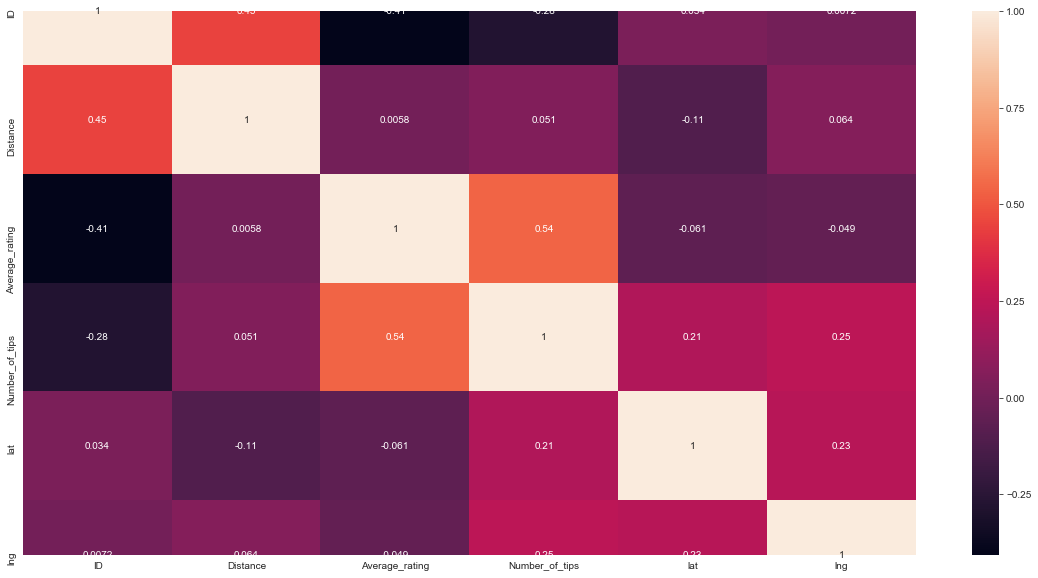

In [203]:
sns.heatmap(df_corr, annot=True)

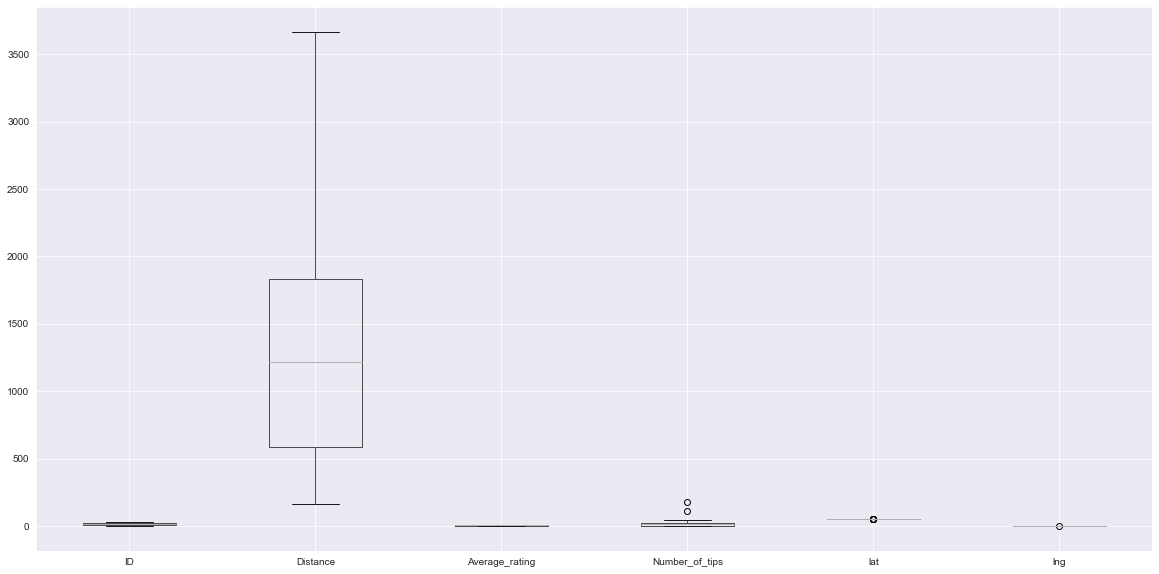

In [209]:
df.boxplot()

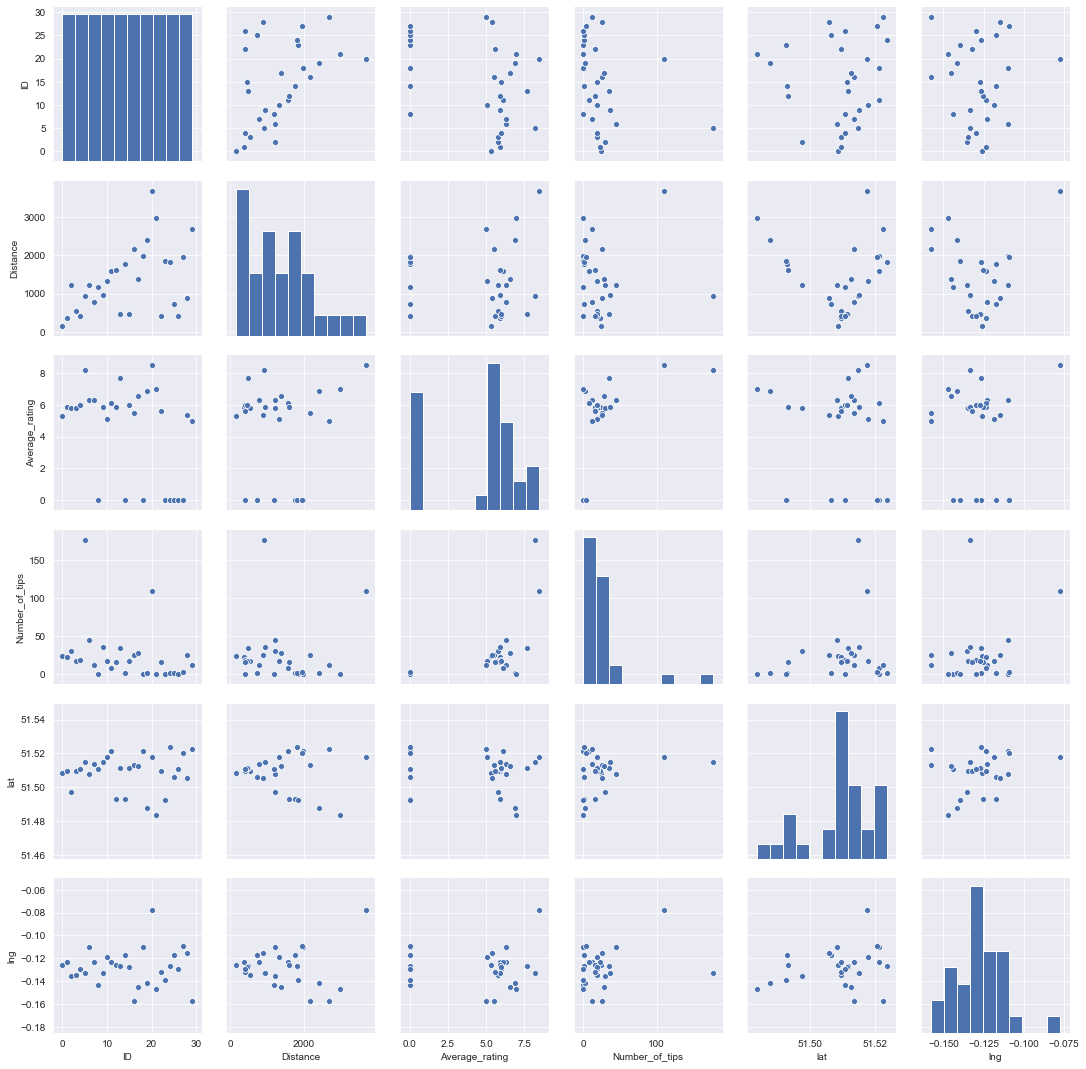

In [207]:
sns.pairplot(df)

In [260]:
df2=pd.read_excel('London_Pizza_Restaurants_Data_1.xlsx')
df1=df2.drop(columns='ID')

In [261]:
df1

,Name,Distance,Average_rating,Number_of_tips
0,Domino's Pizza,1837,0.0,0
1,Gourmet Pizza Co.,1228,6.3,45
2,Mayfair Pizza,1370,6.6,28
3,Pizza,1178,0.0,0
4,Pizza Express1,163,5.3,24
5,Pizza Express2,1213,5.8,30
6,Pizza Express3,772,6.3,12
7,Pizza Express4,953,5.9,36
8,Pizza Express5,1330,5.1,18
9,Pizza Express6,1606,5.9,16


In [262]:
#Scaling the data
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler
# Creating an object for the StandardScaler function
X = StandardScaler()
scaled_df = X.fit_transform(df1.iloc[:,1:6])
scaled_df

array([[ 0.58415849, -1.59465256, -0.66056697],
       [-0.1331327 ,  0.60848584,  0.60794713],
       [ 0.03411746,  0.7133972 ,  0.12873069],
       [-0.1920236 , -1.59465256, -0.66056697],
       [-1.38750891,  0.25878134,  0.01597388],
       [-0.15079997,  0.43363359,  0.18510909],
       [-0.67021772,  0.60848584, -0.32229654],
       [-0.45703266,  0.46860404,  0.35424431],
       [-0.01299526,  0.18884043, -0.15316133],
       [ 0.31208252,  0.46860404, -0.20953974],
       [-1.10247695, -1.59465256, -0.66056697],
       [-1.1389893 ,  0.46860404, -0.01221532],
       [-0.94229369,  0.43363359, -0.15316133],
       [-1.09423222,  0.50357449, -0.12497213],
       [ 0.28145925,  0.53854494, -0.43505335],
       [ 0.97401626,  0.32872224,  0.04416308],
       [ 1.25433695,  0.81830855, -0.60418857],
       [ 1.57823691,  0.15386998, -0.32229654],
       [ 0.75140865, -1.59465256, -0.66056697],
       [-0.48412247,  1.27292441,  4.32892181],
       [-1.01649623,  1.09807216,  0.326

# Creating Clusters using KMeans



In [304]:
#Forming 2 Clusters with K=2
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2)


In [305]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [306]:
## Get the labels
k_means.labels_

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0])

In [307]:
k_means.inertia_

57.60218811006224

In [308]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

31.47907889488347

In [309]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

18.03783385244742

In [310]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

89.99999999999999

In [311]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

11.056495258903105

In [312]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

7.423877341489644

In [313]:
wss =[] 

In [314]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [315]:
wss

[89.99999999999999,
 57.60218811006224,
 31.47907889488347,
 18.03783385244742,
 11.056495258903105,
 7.423877341489644,
 4.271300003365604,
 3.3056603752305054,
 2.6637942140954043,
 2.1058491410768028]

In [316]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns

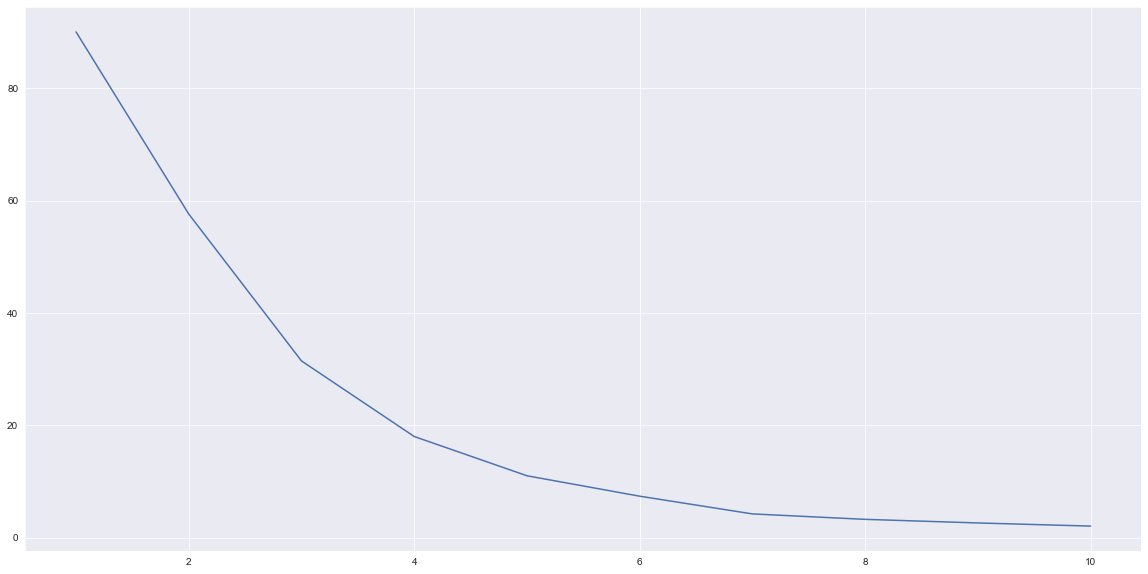

In [317]:
plt.plot(range(1,11), wss)

In [318]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [319]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [320]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels)

0.5164322727742768

In [321]:
k_means = KMeans(n_clusters = 4,random_state=0)
k_means.fit(scaled_df)
labels = k_means.labels_

In [322]:
silhouette_score(scaled_df,labels)

0.5176757954565281

In [323]:
df1["Clus_kmeans3"] = labels
df1

,Name,Distance,Average_rating,Number_of_tips,Clus_kmeans4,Clus_kmeans3
0,Domino's Pizza,1837,0.0,0,1,1
1,Gourmet Pizza Co.,1228,6.3,45,0,0
2,Mayfair Pizza,1370,6.6,28,0,0
3,Pizza,1178,0.0,0,1,1
4,Pizza Express1,163,5.3,24,0,0
5,Pizza Express2,1213,5.8,30,0,0
6,Pizza Express3,772,6.3,12,0,0
7,Pizza Express4,953,5.9,36,0,0
8,Pizza Express5,1330,5.1,18,0,0
9,Pizza Express6,1606,5.9,16,2,2


In [326]:
df3=df1.drop(columns="Clus_kmeans4")

In [327]:
df3

,Name,Distance,Average_rating,Number_of_tips,Clus_kmeans3
0,Domino's Pizza,1837,0.0,0,1
1,Gourmet Pizza Co.,1228,6.3,45,0
2,Mayfair Pizza,1370,6.6,28,0
3,Pizza,1178,0.0,0,1
4,Pizza Express1,163,5.3,24,0
5,Pizza Express2,1213,5.8,30,0
6,Pizza Express3,772,6.3,12,0
7,Pizza Express4,953,5.9,36,0
8,Pizza Express5,1330,5.1,18,0
9,Pizza Express6,1606,5.9,16,2


In [330]:
df3.Clus_kmeans3.value_counts().sort_index()

0    14
1    8 
2    6 
3    2 
Name: Clus_kmeans3, dtype: int64

In [332]:
clust_profile=df3
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=df3.Clus_kmeans3.value_counts().sort_index()
clust_profile

,Distance,Average_rating,Number_of_tips,freq
Clus_kmeans3,,,,
0,755.857143,5.978571,24.785714,14
1,1455.000000,0.000000,0.750000,8
2,2235.500000,6.066667,10.500000,6
3,2298.000000,8.350000,143.500000,2


In [ ]:
# End of Program